*Import Necessary Libraries*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import KMeans

*Create data-frame for Customer Segmentation*

In [ ]:
# create a empty list for store the data
customer_data = []

# Use for loop to store data
for customer_id in range(1, 201):
    gender = random.choice(["Male", "Female"])  # Randomly select gender
    age = np.linspace(18, 70, 200).astype(int)  # Generate 200 person ages from 18 to 70

    # Generate 200 annual income between 8 and 100 in float
    annual_income = np.round(np.linspace(8, 80, 200).astype(float), 1)

    # Condition for annual income
    filtered_income = []
    for income in annual_income:
        if 8 <= income <= 20 or 70 <= income <= 80:
            filtered_income.append(income)

    # Generate 200 spending scores between 8 and 20
    spending_score = np.linspace(8, 20, 200).astype(int)

    # Condition for spending income
    filtered_score = []
    for score in spending_score:
        if 8 <= score <= 10 or 16 <= score <= 20:
            filtered_score.append(score)

    # Randomly choose values
    age = random.choice(age)
    annual_income_value = random.choice(filtered_income)
    spending_score_value = random.choice(filtered_score)

    # Make dictionary and append all data
    customer_data.append({
        "CustomerID": customer_id,
        "Gender": gender,
        "Age": age,
        "Annual Income (LPA)": annual_income_value,
        "Spending Score (1-100)": spending_score_value
    })

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(customer_data)
df.head()


,CustomerID,Gender,Age,Annual Income (LPA),Spending Score (1-100)
0,1,Male,45,17.0,18
1,2,Female,56,14.2,18
2,3,Female,62,76.0,8
3,4,Female,58,77.1,10
4,5,Male,21,79.6,8


In [ ]:
# Save DataFrame to CSV
df.to_csv("customer_data_for_Customer_Segmenatation.csv", index=False)

*Data Collection* and *Data Cleaning*

In [ ]:
customer_main_data = pd.read_csv('/content/customer_data_for_Customer_Segmenatation.csv')
customer_main_data

,CustomerID,Gender,Age,Annual Income (LPA),Spending Score (1-100)
0,1,Male,45,17.0,18
1,2,Female,56,14.2,18
2,3,Female,62,76.0,8
3,4,Female,58,77.1,10
4,5,Male,21,79.6,8
...,...,...,...,...,...
195,196,Female,53,73.8,8
196,197,Male,20,16.7,8
197,198,Male,19,73.8,8
198,199,Female,18,9.1,19


In [ ]:
print(customer_main_data.shape)

(200, 5)


In [ ]:
# getting some informations
customer_main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (LPA)     200 non-null    float64
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


In [ ]:
# first check for missing values
customer_main_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (LPA),0
Spending Score (1-100),0


In [ ]:
x= customer_main_data.iloc[:,[3,4]].values
x

array([[17. , 18. ],
       [14.2, 18. ],
       [76. ,  8. ],
       [77.1, 10. ],
       [79.6,  8. ],
       [80. ,  8. ],
       [10.2, 20. ],
       [12.3,  8. ],
       [ 9.8,  9. ],
       [72.4, 19. ],
       [70.2, 16. ],
       [ 8.4, 18. ],
       [70.6, 19. ],
       [73.5, 19. ],
       [18.5, 17. ],
       [15.2, 10. ],
       [12. ,  9. ],
       [13.4, 10. ],
       [ 9.8, 16. ],
       [72.4,  9. ],
       [10.5,  9. ],
       [15.2,  8. ],
       [ 8.4, 16. ],
       [18.1, 10. ],
       [18.5,  9. ],
       [13.1, 18. ],
       [79.6,  9. ],
       [16. ,  9. ],
       [70.2,  8. ],
       [70.6,  8. ],
       [19.2, 17. ],
       [11.6, 18. ],
       [72.8,  9. ],
       [17.8, 16. ],
       [12.7, 18. ],
       [ 9.4,  8. ],
       [72. , 10. ],
       [14.9,  9. ],
       [72.4, 19. ],
       [12. , 16. ],
       [17.8,  9. ],
       [73.8,  8. ],
       [10.5, 16. ],
       [78.2, 10. ],
       [14.2, 19. ],
       [10.9, 16. ],
       [10.2, 16. ],
       [ 9.8,

*Choosing the number of clusters*

In [ ]:
# Calculating WCSS Values for Varying Cluster Counts
# Initialize an empty list, will store the Within-Cluster Sum of Squares (WCSS) values.
wcss= []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
wcss

[194193.63720000014,
 5831.891498746867,
 4156.875620080012,
 2291.103794683185,
 1983.8149735449729,
 1652.4192484367486,
 1131.6954373866884,
 894.8742768350402,
 587.5854556968286,
 556.9213655991638]

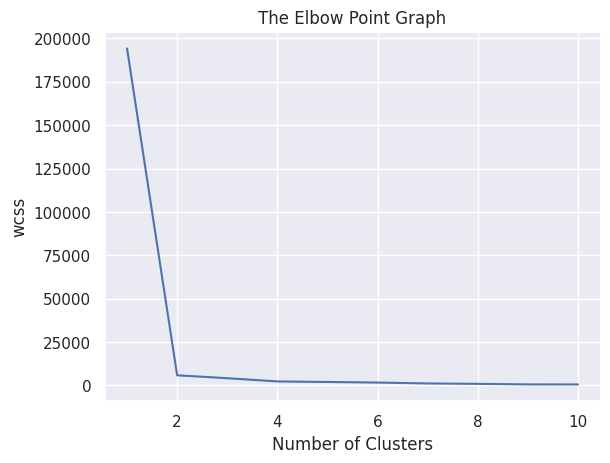

In [ ]:
# plot an elbow graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

*Train the model for Optimum Number of Clusters is 4*

In [ ]:
Kmeans_model = KMeans(n_clusters=4, init='k-means++', random_state=0)
# Assigning Cluster Labels to Each Data Point
y_means = Kmeans_model.fit_predict(x)
print(y_means)

[0 0 1 1 1 1 0 3 3 2 2 0 2 2 0 3 3 3 0 1 3 3 0 3 3 0 1 3 1 1 0 0 1 0 0 3 1
 3 2 0 3 1 0 1 0 0 0 3 0 1 1 0 2 0 3 0 0 2 2 1 2 2 1 3 0 2 3 1 0 0 3 3 1 2
 3 2 0 0 0 1 0 2 2 1 2 1 2 3 1 0 1 1 2 3 2 0 1 3 1 3 2 0 2 2 2 0 2 2 0 0 0
 2 3 2 2 0 1 0 3 2 3 3 1 3 2 3 0 1 2 0 1 2 2 2 0 1 1 2 0 0 0 3 0 2 1 0 2 2
 2 3 0 0 0 2 1 1 0 2 0 0 0 0 0 3 3 3 3 1 2 3 3 2 3 1 2 0 1 2 2 2 0 2 0 2 2
 0 1 0 2 2 2 3 0 0 2 1 3 1 0 3]


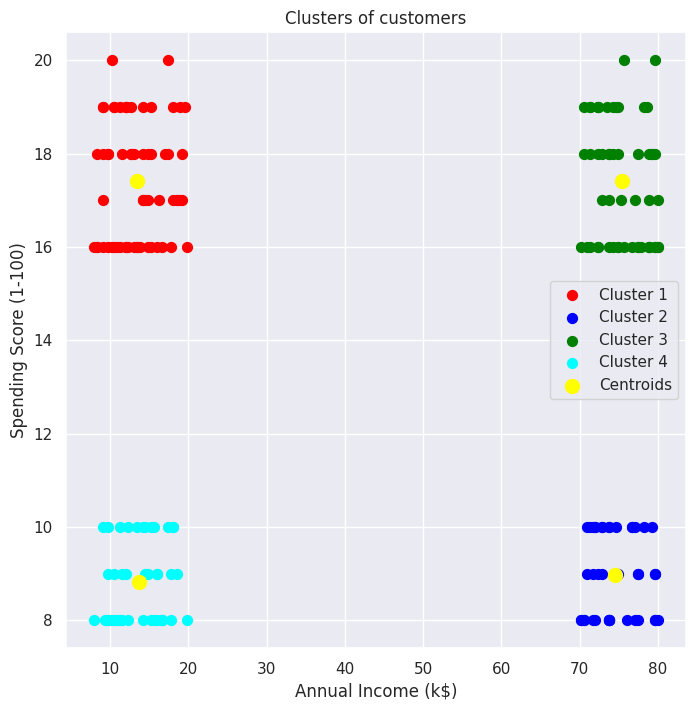

In [ ]:
# Plotting all the clusters in the graph
plt.figure(figsize=(8,8))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
# plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
# plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'black', label = 'Cluster 6')

# plot the centroids
plt.scatter(Kmeans_model.cluster_centers_[:, 0], Kmeans_model.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()